# Chapter 11. 수학용 도구
## 11.1 근사화

In [1]:
import numpy as np
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

C:\Users\tjk\AppData\Local\Temp\ipykernel_6868\3828322551.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


이 장의 주요 예제 함수는 다음과 같이 삼각함수와 선형 항의 합으로 구성됩니다.

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x

핵심은 이 함수를 주어진 구간에서 회귀법(regression)과 보간법(interpolation)으로 근사화하는 것입니다. 우선 근사값이 어떤 형태를 가져야 하는지 살펴보기 위해 그래프를 그려보죠. 관심 구간은 $\left[-2\pi , 2\pi\right]$입니다.

In [4]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [5]:
# 플롯과 계산에 사용되는 x값
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

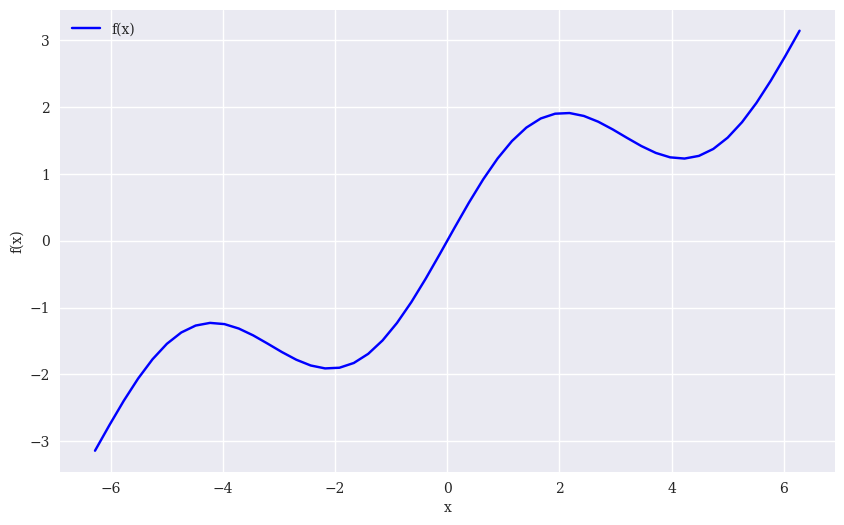

In [6]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

## 11.1.1 회귀법
회귀법은 함수 근사의 경우 효율적인 방법으로 일차원뿐만 아니라 다차원 함수의 근사도 가능합니다. 회귀에 필요한 수치적 방법은 쉽게 구현하고 빠르게 실행할 수 있습니다. 기본적으로 회귀법이란 기저 함수 집합 $b_d$, ($d\in\left\{1,\cdots ,D\right\}$)와 아래 수식에 따라 기저 함수를 조합하기 위한 최적의 매개변수 $\alpha_1^{\ast}, \cdots ,\alpha_D^{\ast}$를 찾는 작업입니다.  
아래 수식에서 $y_i$는 $i\in\left\{1,\cdots,I\right\}$에 대해 $y_i\equiv f\left(x_i\right)$를 만족하는 점을 뜻합니다. 함수 혹은 통계적 관점에서 $x_i$는 독립변수, $y_i$는 종속변수로 생각할 수 있습니다.  
$$\min_{\alpha_1,\cdots ,\alpha_D}\frac{1}{I}\sum_{i=1}^t \left(y_i-\sum_{d=1}^D \alpha_d\cdot b_d\left(x_i\right)\right)^2$$  

#### 단항식 기저 함수
가장 간단한 경우는 기저함수로 $b_1=1$, $b_2=x$, $b_3=x^2$, $b_4=x^3$, $\cdots$와 같이 단항식을 사용하는 경우입니다. 넘파이는 이 경우에 대해 최적 매개변수를 결정하는 `polyfit()` 함수와 주어진 입력 값에 대해 근차값을 계산하는 `polyval()` 함수를 가지고 있습니다.  
아래 표는 `polyfit()` 함수의 인수입니다. `polyfit()` 함수가 반환한 최적 회귀계수 `p`가 주어지면 `np.polyval(p, x)`로 좌표 $x$에 대한 회귀값을 구할 수 있습니다.  

|인수|설명|
|---|---|
|`x`|$x$ 좌표(독립변수값)|
|`y`|$y$ 좌표(종속변수값)|
|`deg`|회귀 다항식의 차수|
|`full`|`True`면 추가적인 진단 정보를 반환합니다.|
|`w`|$y$ 좌표에 적용할 가중치|
|`cov`|`True`면 공분산 행렬도 반환합니다.|  

`polyfit`과 `polyval` 함수를 다음과 같이 `deg=1`로 사용하면 선형회귀가 됩니다. 회귀 추정값이 `ry` 배열에 저장되면 아래 그림과 같이 회귀 결과를 원래 함수와 비교할 수 있습니다. 하지만 ~~당연하게도~~ 선형회귀를 쓰면 예제 함수의 `sin` 부분을 설명할 수 없습니다.

In [7]:
# 선형회귀 단계
res = np.polyfit(x, f(x), deg=1, full=True)

In [8]:
# 최종 결과: 회귀 모수, 잔차, 실질 랭크, 특이값 그리고 조건수
res

(array([ 4.28841952e-01, -6.35579212e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

In [9]:
ry = np.polyval(res[0], x) # 회귀 모수를 사용하여 계산한 값

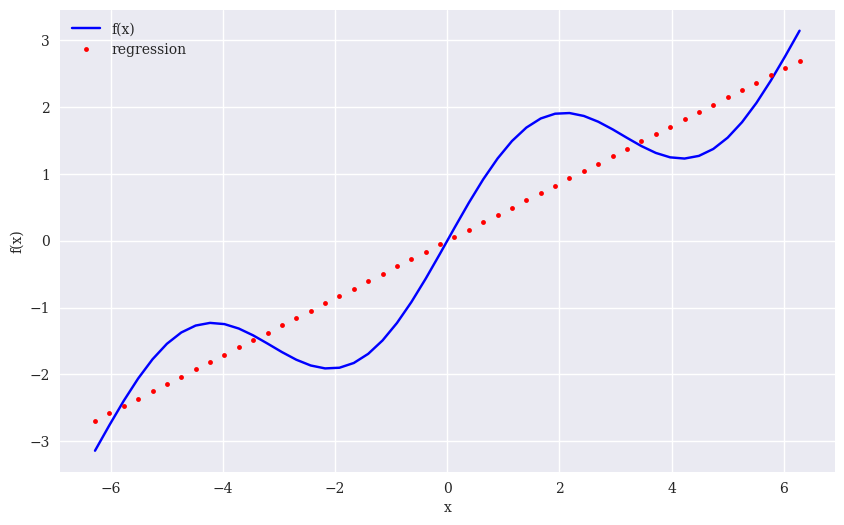

In [10]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

예제 함수의 `sin` 부분을 설명하기 위해서는 고차식이 필요합니다. 다음으로는 5차까지의 단항식을 기저 함수로 사용합니다. 회귀 결과는 아래 그림과 같이 원래 함수에 훨씬 더 가까운 형태가 되지만, 여전히 완벽하지는 않군요.

In [11]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

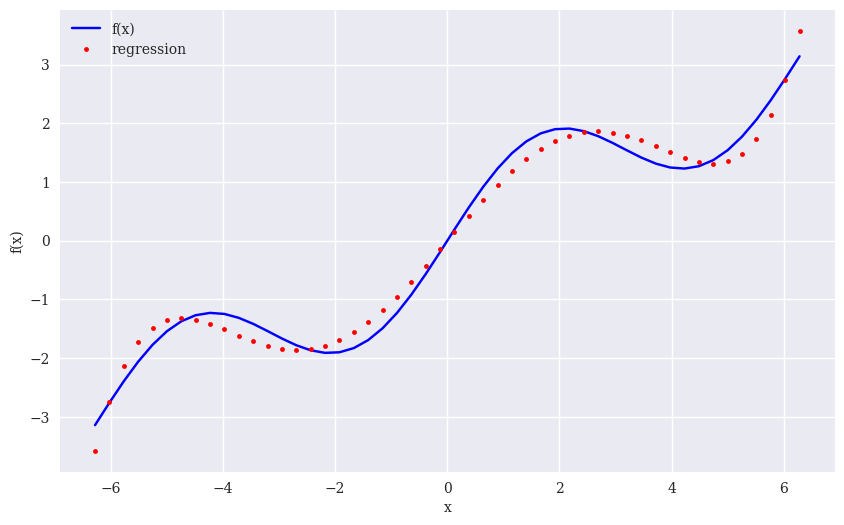

In [12]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

차수를 한 번만 더 올려서 7차까지 써보죠. 이때의 결과는 아래 그림과 같이 원래 함수와 매우 유사합니다.

In [13]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

In [14]:
# 함수와 회귀 결과가 비슷한지 비교
# 정확한 편이기는 하나, 그럼에도 불구하고 완전히 같지는 않습니다.
np.allclose(f(x), ry)

False

In [15]:
# 평균제곱오차(MSE) 계산
np.mean((f(x) - ry) ** 2)

0.001776913475951753

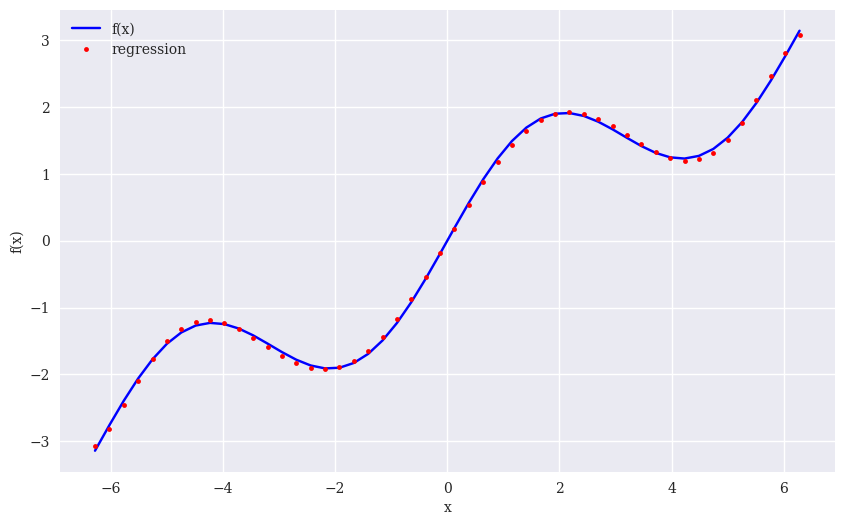

In [16]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

#### 개별 기저 함수
일반적으로 근사하고자 하는 함수에 대해 알고 있는 지식을 사용해 더 적합한 기저 함수를 선택하면 회귀 결과를 향상시킬 수 있습니다. 이 예제의 경우 (넘파이 `ndarray` 객체를 사용한) 행렬 방법으로 정의한 개별 기저 함수를 사용할 수 있습니다. 만약 단순히 기저 함수로 3차까지의 단항식을 사용한다면 기저 함수값은 다음과 같이 행렬로 표시할 수 있습니다. 여기서 중요한 함수는 `np.linalg.lstsq()`입니다.

In [17]:
matrix = np.zeros((3 + 1, len(x))) # 기저 함수 행렬용 ndarray 객체

# 상수부터 3차까지의 기저 함수값
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [18]:
# 회귀분석 단계
reg = np.linalg.lstsq(matrix.T, f(x), rcond=True)[0]

In [19]:
# 최적 회귀분석 모수
reg.round(4)

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [20]:
# 함수에 대한 회귀분석 추정값
ry = np.dot(reg, matrix)

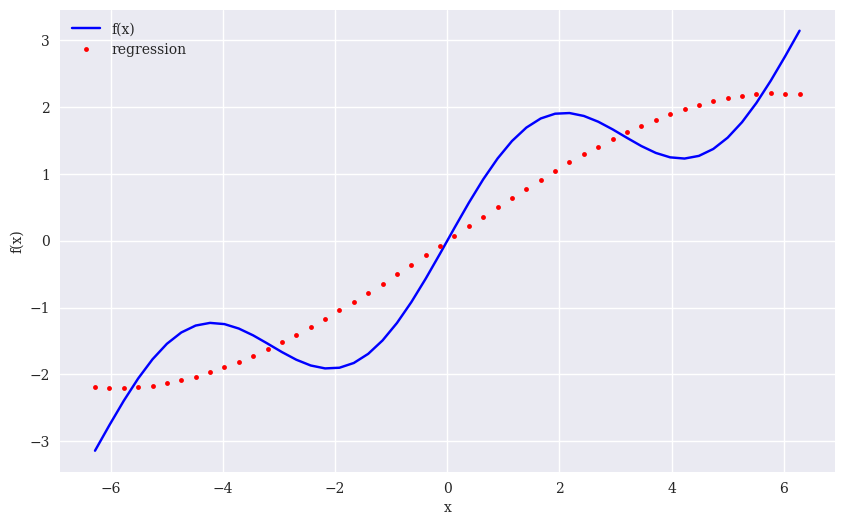

In [21]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

단항식만을 이용하다보니 이전 결과에 비해 썩 나아보이지 않군요. 이번에는 예제 함수에 대해 우리가 알고 있는 지식을 사용해봅시다. 우리는 함수에 $\sin$이 포함되어 있다는 것을 알고 있기 때문에 기저 함수 집합에 사인 함수를 포함할 수 있습니다. 가장 간단한 방법으로 기저 함수 중 가장 고차인 다항식을 사인 함수로 바꿔보겠습니다. 이제는 숫자와 아래 그림이 보여주듯이 회귀 결과가 완벽합니다.

In [22]:
matrix[3, :] = np.sin(x) # 새 기저 함수

In [23]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [24]:
# 최적 회귀 모수값이 원래 모수값과 같습니다.
reg.round(4)

array([0. , 0.5, 0. , 1. ])

In [25]:
ry = np.dot(reg, matrix)

In [26]:
# 회귀분석 결과가 완벽히 일치합니다.
np.allclose(f(x), ry)

True

In [27]:
np.mean((f(x) - ry) ** 2)

2.100650308942046e-31

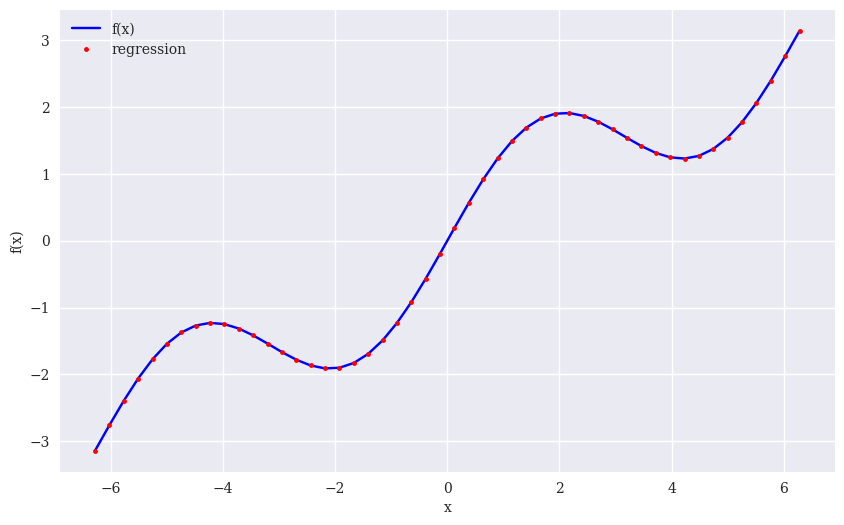

In [28]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

#### 잡음이 있는 데이터
회귀법은 시뮬레이션뿐만 아니라 부정확한 측정으로 얻은 데이터에도 적용할 수 있습니다. 설명을 위해 독립변수와 측정값에 잡음이 있는 데이터를 생성해봅시다. 계산 방법은 이전과 같습니다. 아래 그림을 보면 회귀 결과가 잡음이 있는 데이터보다는 원래 함수에 더 가까운 형태임을 알 수 있습니다. 즉, 회귀법은 어느 정도 잡음(노이즈)을 소거하는 특성을 가집니다.

In [29]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)

# x, y값에 노이즈 추가
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.15 * np.random.standard_normal(len(xn))

In [30]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

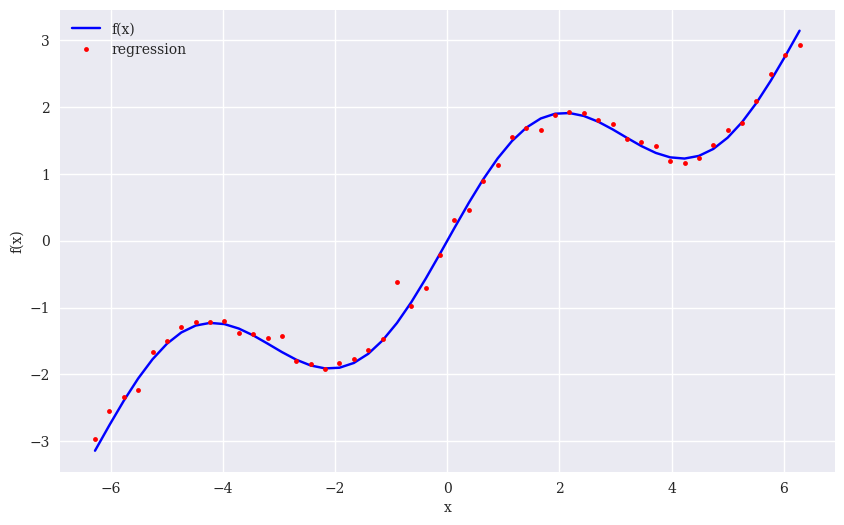

In [31]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

#### 정렬되지 않은 데이터
회귀법의 또다른 특성은 정렬되지 않은 데이터에도 적용할 수 있다는 점입니다. 지금까지의 데이터는 모두 정렬된 $x$ 데이터를 기반으로 하였으나, 사실 그럴 필요는 없습니다. 설명을 위해 독립변수를 무작위로 생성해보겠습니다. 이 경우에는 원래의 자료를 시각화하는 것만으로는 구조를 파악하기 어렵습니다.

In [32]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi # x값 난수화
yu = f(xu)

In [33]:
# 난수값 확인
print(xu[:10].round(2))
print(yu[:10].round(2))

[ 2.02  1.44 -3.2  -6.23 -4.09 -4.88 -3.39  3.08 -3.56 -5.58]
[ 1.91  1.71 -1.54 -3.07 -1.23 -1.45 -1.45  1.6  -1.37 -2.14]


In [34]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

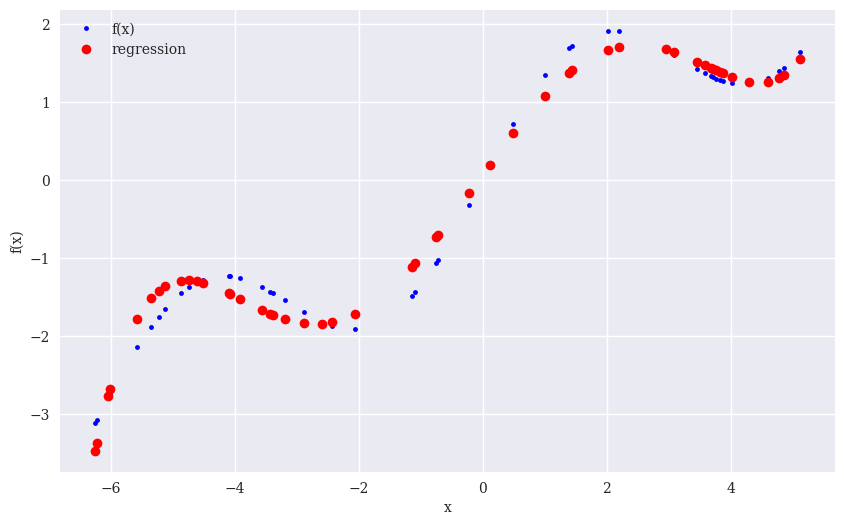

In [35]:
create_plot([xu, xu], [yu, ry], ['b.', 'ro'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

잡음이 있는 데이터와 마찬가지로 **회귀 방법은 관측점의 순서에 영향을 받지 않습니다**. 수식 최적화 문제의 구조를 살펴보면 이 사실이 명확합니다. 위 그림의 회귀 결과에서도 이를 확인할 수 있습니다.  
#### 다차원 데이터
최소 자승 회귀법의 또다른 장점은 별다른 수정 없이도 다차원 데이터에 쓸 수 있는 점입니다. 예제로 다음과 같은 함수 `fm()`을 정의해보죠.

In [36]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

이 함수를 시각화하려면 독립변수의 2차원 그리드(grid)가 필요합니다. 이렇게 X, Y, Z에 들어간 독립변수와 종속변수 그리드에 기반하여 아래 그림과 같이 함수 `fm()`의 형태를 그립니다.

In [37]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)

In [38]:
Z = fm((X, Y))

# 2차원 ndarray 객체의 1차원 ndarray로의 변환
x = X.flatten()
y = Y.flatten()

In [39]:
from mpl_toolkits.mplot3d import Axes3D # 3차원 플롯 기능 임포트

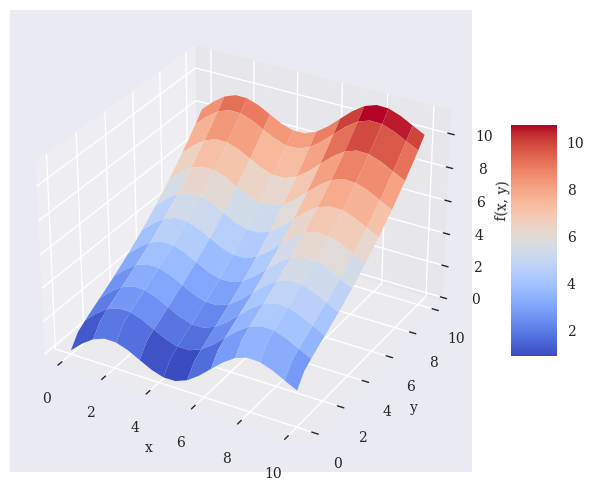

In [40]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 6))
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

잘된 회귀 결과를 얻기 위해 우리가 예제 함수 `fm()`에 대해 알고 있는 정보를 사용하여 `np.sin()` 함수와 `np.sqrt()` 함수를 포함하는 기저 함수 집합을 만듭니다. 아래 그림에서 완벽한 회귀 결과를 볼 수 있습니다.

In [41]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y) # y 인수용 np.sqrt() 함수
matrix[:, 5] = np.sin(x) # x 인수용 np.sin() 함수
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [42]:
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]

In [43]:
# 회귀분석 결과를 그리드 구조로 변환
RZ = np.dot(matrix, reg).reshape((20, 20))

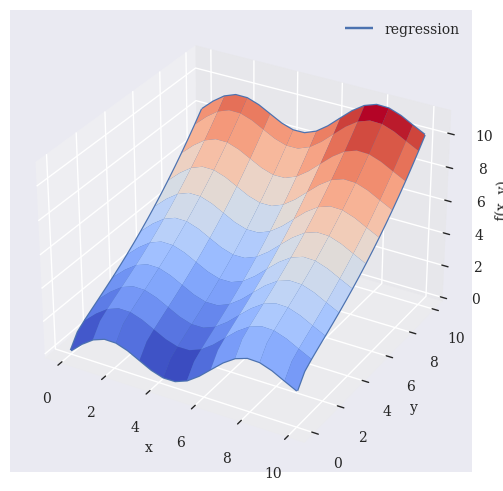

In [44]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 6))

# 원래 함수 플롯
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                        cmap=mpl.cm.coolwarm, linewidth=0.5,
                        antialiased=True)

# 회귀분석 결과 플롯
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)

> **TIP** 회귀법
최소자승 회귀법은 간단한 함수의 근사부터, 잡음이 있거나 정렬되지 않은 함수의 근사까지 다양하게 응용할 수 있습니다. 이 방법은 1차원 함수뿐만 아니라 다차원 함수에도 적용 가능합니다. 어디에 응용하든 기저에 깔린 수학적 방법론은 거의 동일합니다.  

### 11.1.2 보간법
회귀법과 달리 보간법(interpolation)은 수학적으로 훨씬 더 복잡하고 다차원에 적용하기 어렵습니다. 보간법은 $x$차원의 정렬된 관측점이 주어졌을 때 두 개의 이웃하는 관측점 사이의 자료를 계산하는 보간 함수를 만드는 것입니다. 보간 함수는 관측점 자체도 정확하게 재현해야 하고 각 관측점에서 연속 미분 가능한 함수(continuously differentiable function)여야 합니다. 이를 위해서는 보간 함수가 최소 3차 이상, 즉 큐빅 스플라인 함수(cubic spline function)이어야 합니다. 그러나 이 방법론 자체는 2차 보간 함수나 1차 선형 보간 함수에도 적용 가능합니다. 다음 코드는 선형 스플라인 보간을 구현한 것입니다.

In [45]:
# scipy에서 필요한 서브패키지 임포트
import scipy.interpolate as spi

In [46]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [47]:
def f(x):
    return np.sin(x) + 0.5 * x

In [48]:
# 선형 스플라인 보간 구현
ipo = spi.splrep(x, f(x), k=1)

In [49]:
# 보간된 값 유도
iy = spi.splev(x, ipo)

In [50]:
np.allclose(f(x), iy)

True

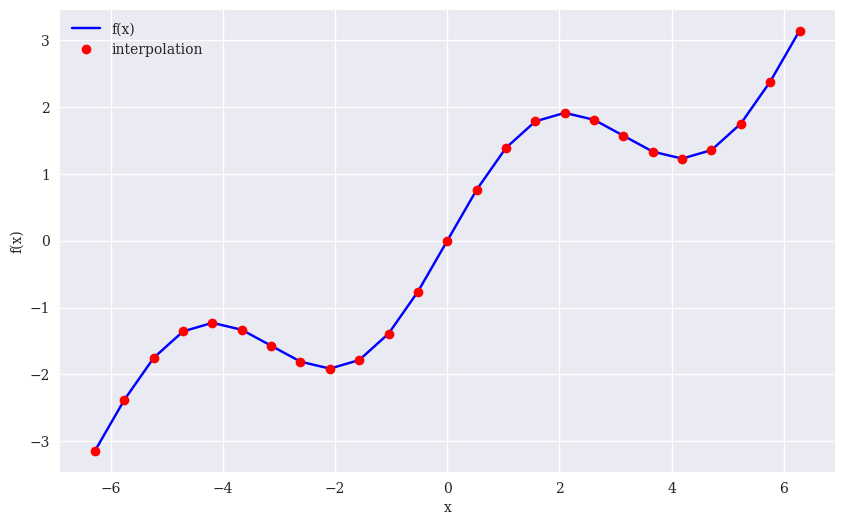

In [51]:
create_plot([x, x], [f(x), iy], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])

보간법은 $x$축 방향으로 정렬된 자료를 사용한다는 점만 빼면 회귀 방법과 유사합니다. 다만 여기에서는 `polyfit()`과 `polyval()` 함수 대신 `splrep()`과 `splev()` 함수를 각각 사용한다는 게 차이점이죠. 아래 표는 `splrep()` 함수의 주요 인수입니다.  

|인수|설명|
|---|---|
|`x`|(정렬된) $x$ 좌표 (독립변수값)|
|`y`|($x$ 방향으로 정렬된) $y$ 좌표 (종속변수값)|
|`w`|$y$ 좌표에 적용할 가중치|
|`xb`, `xe`|적용 구간, 기본값은 `[x[0], x[-1]]`|
|`k`|스플라인 함수의 차수 ($1\leq k\leq 5$)|
|`s`|스무딩 팩터(숫자가 클수록 곡선이 부드러워집니다)|
|`full_output`|`True`일 경우 추가적인 출력이 반환됩니다.|
|`quiet`|`True`일 경우 메시지를 출력하지 않습니다.|  

아래 표는 `splev` 함수의 주요 인수입니다.  

|인수|설명|
|---|---|
|`x`|(정렬된) $x$ 좌표 (독립변수값)|
|`tck`|`splrep` 함수가 반환한 (knots, coefficients, degree) 값|
|`der`|미분 차수(0이면 함수, 1이면 1차 도함수)|
|`ext`|`x`가 범위 밖인 경우의 행동(0이면 외삽(extrapolation), 1이면 0 값, 2이면 `ValueError` 예외 발생)|  

스플라인 보간법은 금융 분야에서 독립변수값을 관측할 수 없을 경우의 종속변수값을 추정할 때 종종 사용됩니다. 이제 더 작은 구간에서 선형 스플라인을 사용했을 경우에 보간된 값을 자세히 살펴보겠습니다. 아래 그림은 두 관측점 사이를 선형으로 보간한 경우를 보입니다. 응용 분야에 따라서는 이 정도의 정확도는 턱없이 부족할 수 있습니다. 또한 보간된 함수가 관측점 위치에서 미분가능하지 않다는 점도 명확합니다.

In [52]:
# 구간의 수를 늘리고 간격을 더 작게 합니다.
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

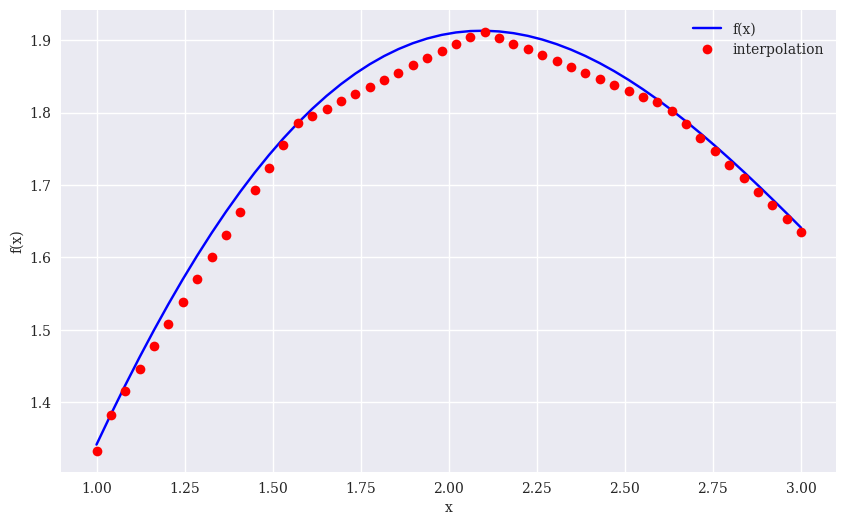

In [53]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])

그럼 이번에는 3차 큐빅 스플라인을 사용해서 다시 풀어보죠.

In [54]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

In [55]:
# 여전히 보간 결과는 완벽하지 않습니다.
np.allclose(f(xd), iyd)

False

In [56]:
# 하지만 MSE 값은 개선되었습니다.
np.mean((f(xd) - iyd) ** 2)

1.1349319851436252e-08

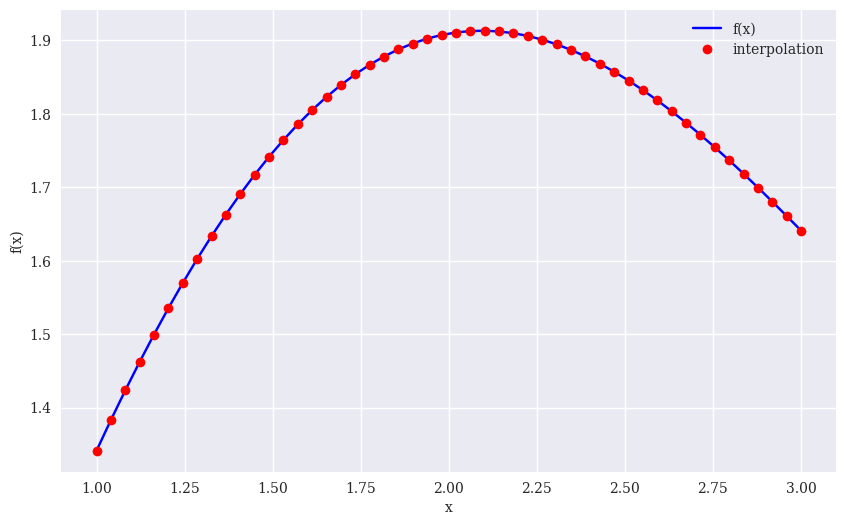

In [57]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])

> **TIP** 보간법  
스플라인 보간법을 적용하면 최소자승 회귀법보다 더 정확한 근사 결과를 얻을 수 있습니다. 그러나 보간법을 사용하려면 데이터가 정렬되어 있어야 하고 잡음이 없어야 하며 다차원 문제에는 적용할 수 없습니다. 또한 계산량이 훨씬 많기 때문에 어떤 경우에는 회귀법보다 계산 시간이 훨씬 오래 걸릴 수 있습니다.  

## 11.2 최적화
금융이나 경제 분야에서는 최적화(convex optimization)가 중요한 역할을 합니다. 예를 들어 옵션 가격 계산을 위해 시장 데이터를 기반으로 인수 교정(calibration)을 하거나 대리인의 효용 함수를 최적화하는 경우가 있겠습니다.  
우리가 최적화하려는 함수의 예로 다음과 같이 정의된 함수 `fm()`을 가정해보죠.

In [58]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2)

아래 그림은 주어진 `x`, `y` 구간에서의 함수 형태를 나타냅니다. 여기서 이 함수가 여러 개의 국소(local) 최소점이 있음을 알 수 있습니다. 이 그림만으로는 전역(global) 최소점이 존재하는지 알기는 어렵지만, 그런 것처럼 보이기는 하는군요.

In [59]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

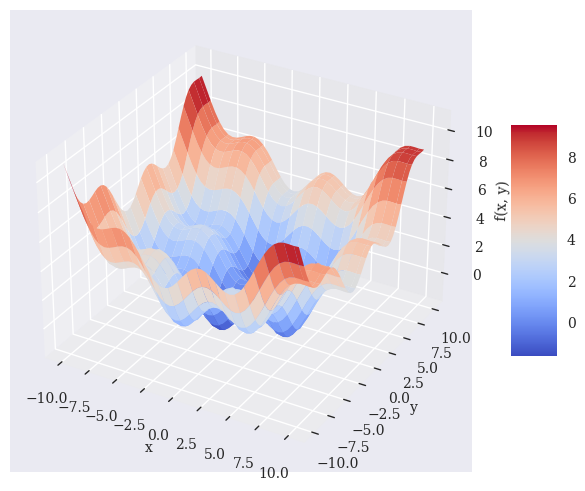

In [60]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 6))
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### 11.2.1 전역 최적화
이제 전역/국소 최적화 방법을 구현해보죠. 우리가 사용할 함수 `sco.brute()`와 `sco.fmin()`은 사이파이 라이브러리의 하위 라이브러리인 `scipy.optimize`에 있습니다.  
최적화 과정을 수행할 때 일어나는 일들을 더 자세히 살펴보기 위해 인수값과 함수값을 출력하도록 원래의 함수를 고칩니다. 이제 다음 코드에서 보듯이 최적화 과정에서 발생하는 일들을 추적할 수 있습니다.

In [61]:
import scipy.optimize as sco

In [62]:
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output==True: # output이 True일 때 정보 출력
        print(f"{x:8.4f} | {y:8.4f} | {z:8.4f}")
    return z

In [63]:
output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None) # 최적화

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

이 결과에 따르면 최적의 인수값은 `x=y=0`이고 이때의 함수값은 0입니다. 이 값이 전역 최소점처럼 보이긴 하네요. 하지만 여기에서는 각 인수값에 대한 조사 간격을 5로 느슨하게 사용했습니다. 이 값을 조정하면 더 자세히 조사할 수 있습니다. 다음 코드를 보면 이전의 결과가 최적해가 아님이 드러납니다.

In [64]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)

In [65]:
opt1

array([-1.4, -1.4])

In [66]:
fm(opt1)

-1.7748994599769203

이제 최적 인수값은 `x=y=-1.4`이고, 전역 최소화 지점에서의 함수값은 -1.7749입니다.

### 11.2.2 국소 최적화
방금 구한 전역 최적화 결과를 기반으로 국소 최적화를 진행하겠습니다. 함수 `sco.fmin()`은 최소화하려는 함수와 시작 인수값을 입력으로 받습니다. 추가로 인수나 함수값의 허용오차 수준을 정의하거나 반복 계산 최대 횟수를 정할 수도 있습니다. 국소 최적화는 결과를 개선해줍니다.

In [67]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,
                maxiter=15, maxfun=20)

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


C:\Users\tjk\AppData\Local\Temp\ipykernel_6868\3595886849.py:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,


In [68]:
opt2

array([-1.42702972, -1.42876755])

In [69]:
fm(opt2)

-1.7757246992239009

대부분의 최적화 문제에서는 국소 최소값을 구하기 전에 전역 최소화를 할 것을 권장합니다. 이유인 즉, 국소 최소화 알고리즘이 어떤 국소 최소점에 빠져버리게 되면 더 나은 국소 최소값이나 전역 최소값을 찾아내지 못하기 때문입니다. 다음 예는 시작 인수값을 `x=y=2`로 하는 경우에 찾아낸 최소값이 0보다 커지는 것을 보여줍니다. 조금 전의 값과는 다른 국소 최소값에 빠진 것으로 해석하면 됩니다.

In [70]:
output = False
sco.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

### 11.2.3 제약 조건이 있는 최적화
지금까지는 제약 조건이 없는 최적화 문제를 고려했습니다. 그러나 경제 혹은 금융 관련 최적화 문제는 한 개 이상의 제약 조건을 가지는 경우가 많습니다. 이러한 제약 조건들은 등식이나 부등식의 형태로 주어집니다.  
간단한 예로 두 개의 위험 주식에 투자하는 투자자의 기대 효용함수를 최대화하는 효용함수 최대화 문제를 생각해봅시다. 두 위험 주식은 모두 현재 시점에 $q_a=q_b=10$달러의 비용을 요구합니다. 1년 후 이 주식들은 $u$에서는 각각 15달러와 5달러의 가치를, 상태 $d$에서는 각각 5달러와 12달러의 가치를 가집니다. 각 상태가 나올 확률은 같습니다. 두 경우의 주식 가치를 벡터로 표시한 값을 각각 $r_a$, $r_b$라고 해보겠습니다.  
투자자가 가지고 있는 예산은 $w_0=100$달러고 미래의 주식 가치에서 얻을 수 있는 효용은 효용함수 $u\left(w\right)=\sqrt{w}$로 표시합니다. 여기에서 $w$는 달러로 표시된 미래 자산 가치의 합입니다. 아래 수식은 이 문제를 최대화 문제 형태로 나타낸 것으로 $a$, $b$는 각 주식의 보유 주식 수입니다.  
$$\max _{a, b}E\left(u\left(w_1\right)\right)=p\sqrt{w_{1u}}+\left(1-p\right)\sqrt{w_{1d}}$$  
$$w_1=a\cdot r_a+b\cdot r_b$$  
$$w_0\ge a\cdot q_a + b\cdot q_b$$
$$a, b\ge 0$$  
주어진 수치 가정을 사용하면 앞의 문제는 아래 수식과 같아집니다. 기대 효용함수의 부호를 반대로 하여 최소화 문제로 만든 것입니다.  
$$\min _{a, b}-E\left(u\left(w_1\right)\right)=-\left(0.5\cdot\sqrt{w_{1u}}+0.5\cdot\sqrt{w_{1d}}\right)$$  
$$w_{1u}=a\cdot 15+b\cdot 5$$  
$$w_{1d}=a\cdot 5+b\cdot 12$$  
$$100\ge a\cdot 10 + b\cdot 10$$
$$a, b\ge 0$$  

이 문제를 푸는 데는 `scipy.optimize.minimize()` 함수를 사용합니다. 이 함수는 최소화하고자 하는 함수와 제약 조건이 되는 등식 및 부등식을 사전 객체를 원소로 가지는 리스트 객체 형태로 받고, 인수의 범위를 튜플 객체를 원소로 가지는 튜플 객체 형태로 받습니다. 아래 코드와 같이 바뀝니다.

In [71]:
import math

In [72]:
def Eu(p):
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) + 0.5 * math.sqrt(s * 5 + b * 12))

In [73]:
# dict 객체 형태의 부등식 제약 조건
cons = ({'type': 'ineq',
         'fun': lambda p: 100 - p[0] * 10 - p[1] * 10})

In [74]:
bnds = ((0, 1000), (0, 1000)) # 경계 조건 인수

In [75]:
# 제약 조건이 있는 최적화
result = sco.minimize(Eu, [5, 5], method='SLSQP',
                      bounds=bnds, constraints=cons)

`result` 객체는 모든 관련 정보를 담고 있습니다. 최소화 함수값을 얻으려면 부호를 반대로 해야 합니다.

In [76]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -9.700883611487832
       x: [ 8.025e+00  1.975e+00]
     nit: 5
     jac: [-4.851e-01 -4.849e-01]
    nfev: 16
    njev: 5

In [77]:
# 최적 인수값
result['x']

array([8.02547122, 1.97452878])

In [78]:
# 최적해의 음수 값
-result['fun']

9.700883611487832

In [79]:
# 예산 제약 조건에 걸려서 모든 자산이 투자됩니다.
np.dot(result['x'], [10, 10])

99.99999999999999

## 11.3 적분
가치 평가나 옵션 가격결정에서 적분은 특히 중요한 수학 도구입니다. 파생상품의 위험 중립 가치는 일반적으로 위험 중립 척도 하에서 최종 가치를 할인한 값의 기대값으로 표현됩니다. 기대값은 이산 확률 문제에서는 합계로 계산하고, 연속 확률 문제에서는 적분으로 계산합니다. `scipy.integrate` 라이브러리는 여러 수치 적분 계산을 위한 다양한 함수를 제공합니다. 예제 함수는 근사화에서 사용한 것을 가져오겠습니다.

In [80]:
import scipy.integrate as sci

In [81]:
def f(x):
    return np.sin(x) + 0.5 * x

적분 구간은 `[0.5, 9.5]`이고 아래 수식과 같은 정적분을 수행합니다.  
$$\int_{0.5}^{9.5}f\left(x\right)dx=\int_{0.5}^{9.5}\sin{x}+\frac{x}{2}dx$$

In [82]:
x = np.linspace(0, 10)
y = f(x)
a = 0.5
b = 9.5
Ix = np.linspace(a, b)
Iy = f(Ix)

In [83]:
from matplotlib.patches import Polygon

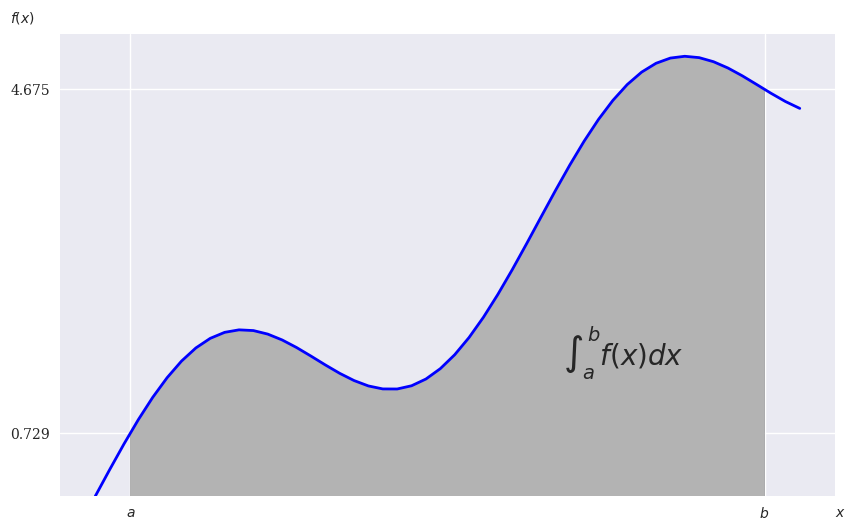

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
verts = [(a, 0)] + list(zip(Ix, Iy)) +[(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)]);

### 11.3.1 수치적분
`scipy.integrate` 서브패키지는 주어진 수학 함수를 구간 내에서 수치적으로 정적분하기 위한 다양한 함수를 가지고 있습니다. 예를 들어 `sci.fixed_quad()` 함수는 가우스 구적법(fixed Gaussian quadrature)을, `sci.quad()` 함수는 적응 구적법(adaptive quadrature)을, `sci.romberg()` 함수는 롬베르크 적분법(Romberg integration)을 사용하여 정적분값을 계산합니다.

In [85]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [86]:
sci.quad(f, a, b)[0]

24.374754718086752

In [87]:
sci.romberg(f, a, b)

24.374754718086713

`list`나 `ndarray` 객체를 통해 함수값을 입력받는 정적분 함수도 있습니다. 예를 들어 사다리꼴법(trapezoidal rule)을 사용하는 `sci.trapz()` 함수, 심슨 방법(Simpson's rule)을 사용하는 `sci.simps()` 함수 등입니다.

In [88]:
xi = np.linspace(0.5, 9.5, 25)

In [89]:
sci.trapz(f(xi), xi)

24.352733271544516

In [90]:
sci.simps(f(xi), xi)

24.37496418455075

### 11.3.2 시뮬레이션을 사용한 적분 계산
몬테카를로 시뮬레이션으로 옵션과 파생상품의 가치를 평가(12장 참조)하는 것은 시뮬레이션으로 정적분을 계산할 수 있기 때문입니다. 정적분 구간 사이에 있는 임의의 $x$값들을 생성하여 이 값들에 대해 함수값을 계산하고 이들의 평균값을 구하면 적분 구간에 대한 함수의 평균값을 구한 것과 같습니다. 이 평균값을 적분 구간의 길이와 곱하여 적분 구간에 대한 정적분값을 추정합니다.  
다음 코드는 몬테카를로 시뮬레이션에 사용한 난수 $x$값의 개수가 증가할수록 몬테카를로 시뮬레이션으로 추정한 적분값이 실제 적분값으로 (단조감소하지는 않지만) 수렴하는 것을 알 수 있습니다. 사실 난수의 개수가 크지 않아도 추정치는 충분히 정답에 가까워집니다.

In [91]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a
    print(np.mean(f(x)) * (b - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


## 11.4 심볼릭 연산
이전 절까지는 주로 수치 계산을 다루었지만 이번 절에서는 금융공학의 다양한 분야에 응용 가능한 심볼릭(symbolic) 연산을 소개합니다. 이를 위해 심파이(SymPy)라는 심볼릭 연산용 라이브러리가 사용됩니다.

### 11.4.1 심볼릭 연산 기초
심파이는 몇 가지 새로운 객체 클래스를 도입합니다. 가장 기본적인 클래스는 `Symbol` 클래스입니다.

In [92]:
import sympy as sy

In [93]:
x = sy.Symbol('x')
y = sy.Symbol('y')

In [94]:
type(x)

sympy.core.symbol.Symbol

In [95]:
sy.sqrt(x)

sqrt(x)

In [96]:
3 + sy.sqrt(x) - 4 ** 2

sqrt(x) - 13

In [97]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2

In [98]:
sy.simplify(f)

1.5*x**2 + 4.5

이 코드는 지금까지의 계산과 큰 차이를 보입니다. `x`는 특정한 수치값이 없지만 `Symbol` 객체이기 때문에 `SymPy`를 쓰면 `x`의 제곱근을 정의할 수 있습니다. 즉 `sy.sqrt(x)`는 수학식의 일부가 될 수 있습니다. 심파이는 수학식을 자동으로 단순화합니다. 같은 방법으로 `Symbol` 객체를 사용하여 임의의 함수도 정의할 수 있습니다. 단, 이 함수를 파이썬 함수와 혼동하면 안 됩니다.  
기본적으로 심파이는 수학식을 세 가지 형태로 표현합니다.  
* 레이텍 기반
* 유니코드 기반
* 아스키 기반

예를 들어 IPython 노트북에서는 레이텍 표현이 시각적으로 좋은 선택입니다. 여기에서는 별도의 출력 기법을 쓰지 않는 가장 단순한 방식인 아스키 방식을 사용하겠습니다.

In [99]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [100]:
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [101]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


여기서 더 자세히 나가지는 않겠지만, 심파이는 이외에도 다양한 함수를 제공합니다. 예를 들어 $\pi$를 수치적으로 계산할 수도 있습니다. 다음 코드는 $\pi$를 40만 자릿수까지의 문자열로 나타낸 뒤 앞 40자리를 표시합니다. 원한다면 이 숫자 중에 자신의 생일이 있는지도 조사할 수 있습니다.

In [102]:
%time pi_str = str(sy.N(sy.pi, 400000))

CPU times: total: 8.86 s
Wall time: 8.95 s


In [103]:
pi_str[:42] # 소숫점 아래 40자리

'3.1415926535897932384626433832795028841971'

In [104]:
pi_str[-40:] # 마지막 40자리

'8245672736856312185020980470362464176199'

In [105]:
%time pi_str.find('960306') # 없ㅋ음ㅋ

CPU times: total: 0 ns
Wall time: 997 µs


-1

### 11.4.2 방정식
심파이의 장점은 $x^2 - 1 = 0$과 같은 방정식을 풀 수 있다는 점입니다. 보통 심파이는 주어진 수식이 0일 때의 방정식을 대상으로 해를 찾습니다. 따라서 $x^2 - 1 = 3$과 같은 방정식을 구하려면 다음과 같이 풀어야 합니다. 물론 심파이는 $x^3+0.5x^2-1=0$ 같이 더 복잡한 수식도 풀 수 있습니다. 복수 개의 인자를 가진 함수나 복소수도 다룰 수 있습니다. 예를 들어 $x^2 + y^2 = 0$과 같은 방정식도 풀 수 있습니다.

In [106]:
sy.solve(x ** 2 - 1)

[-1, 1]

In [107]:
sy.solve(x ** 2 - 1 - 3)

[-2, 2]

In [108]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [109]:
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

### 11.4.3 적분
심파이의 또 다른 장점은 미적분이 가능하다는 점입니다. 수치적분과 시뮬레이션 적분에서 사용한 예제 함수를 다시 사용하여 이번에는 심볼릭 연산 결과와 수치적으로 정확한 값을 유도합니다. 우선 적분 구간에 대한 심볼이 필요합니다.

In [110]:
# 적분 구간용 심볼 객체
a, b = sy.symbols('a b')

In [111]:
# 적분 객체 정의
I = sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))

In [112]:
print(sy.pretty(I))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [113]:
# 부정적분 유도
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)

In [114]:
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [115]:
# 극한값 계산
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()

In [116]:
# 적분의 수치값
Fb - Fa

24.3747547180867

이 적분을 심볼릭 정적분을 사용하여 풀면 아래와 같습니다.

In [117]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))

In [118]:
print(sy.pretty(int_func_limits))

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [119]:
# dict 객체와 대치를 사용한 수치적 적분 연산
int_func_limits.subs({a: 0.5, b: 9.5}).evalf()

24.3747547180868

In [120]:
# 한 번에 수치적으로 적분 연산
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))

24.3747547180867

### 11.4.4 미분
부정적분 함수를 다시 미분하면 원래의 함수가 됩니다. 심볼릭 부정적분으로 구한 결과에 `sy.diff()` 함수를 적용하여 이를 확인해보겠습니다.

In [121]:
int_func.diff()

0.5*x + sin(x)

미분을 사용하여 이전에 살펴본 최적화 문제의 정확한 해를 유도하고자 합니다. 이를 위해 해당 함수를 다음과 같이 심볼릭 정의하고 편미분을 유도한 뒤 해를 찾습니다.  
전역 최소화를 위한 필요조건은 두 개의 편미분 값이 모두 0이 되어야 한다는 것입니다. 아까 살펴본 바와 같이 알고리즘적으로나 수학 원리적으로 심볼릭 해가 존재한다는 보장은 없습니다. 그러나 이전에 최적화 문제에서 나온 결과를 시작점으로 두 방정식을 수치적으로 풀 수는 있습니다.

In [122]:
# 함수의 심볼릭 버전
f = (sy.sin(x) + 0.05 * x ** 2
     + sy.sin(y) + 0.05 * y ** 2)

In [123]:
del_x = sy.diff(f, x)
del_x

0.1*x + cos(x)

In [124]:
del_y = sy.diff(f, y)
del_y

0.1*y + cos(y)

In [125]:
# 해에 대한 초기값과 결과로 나온 최적값
xo = sy.nsolve(del_x, -1.5)
xo

-1.42755177876459

In [126]:
yo = sy.nsolve(del_y, -1.5)
yo

-1.42755177876459

In [127]:
# 전역 최소점의 함수값
f.subs({x: xo, y: yo}).evalf()

-1.77572565314742

만약 우리가 이러한 값을 이용하지 않고 임의의 값을 시작점으로 사용하면 전역 최소점이 아닌 국소 최소점에 빠질 수도 있습니다.

In [128]:
xo = sy.nsolve(del_x, 1.5)
xo

1.74632928225285

In [129]:
yo = sy.nsolve(del_y, 1.5)
yo

1.74632928225285

In [130]:
f.subs({x: xo, y: yo}).evalf()

2.27423381055640

이 결과는 편미분값이 0인 조건이 필요조건이지만 충분조건이 아님을 보여줍니다.  
> **TIP** 심볼릭 연산  
파이썬으로 수학을 풀이할 때는 항상 심파이를 사용한 심볼릭 연산을 염두에 두어야 합니다. 특히 상호대화형 금융 분석 시에는 심볼릭 연산이 훨씬 효율적일 수 있습니다.  

## 11.5 마치며
이 장에서는 금융과 관련된 몇 가지 수학적인 주제와 도구를 다뤘습니다. 예를 들어 함수 근사는 이자율 곡선 보간이나 아메리칸 옵션 가치 계산을 위한 회귀 기반 몬테카를로 분석 등의 여러 가지 금융 분야에서 중요합니다. 최적화 기법도 금융 분야에서 자주 사용됩니다. 예를 들어 옵션 가격결정 모형의 인자들을 시장 호가나 내재 변동성 등에 맞추는 경우 최적화가 사용됩니다.  
수치적분은 옵션 및 파생상품의 가격결정 시 빠질 수 없는 요소입니다. 옵션 가치 계산은 확률 프로세스의 위험 중립 확률 측도를 구한 다음, 단순히 옵션의 최종 가치를 그 확률 척도하에 현재가로 할인하여 기대치를 구하는 것일 뿐입니다. 12장에서 몇 가지 유형의 확률 프로세스를 위험 중립 척도에서 시뮬레이션하는 것을 다루겠습니다.  
마지막으로 심파이를 사용한 심볼릭 연산을 소개했습니다. 적분, 미분, 방정식과 같은 다양한 수학 연산에서 심볼릭 연산은 아주 유용하고 효율적인 도구가 될 수 있습니다.